<a href="https://colab.research.google.com/github/DionKimmm/2019SummerML/blob/master/Day13_HousePrice_Prediction(CWAPP).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2019 ML Month(Kaggle Korea) : House Price Prediction
## 목차
* 데이터 탐색
  * 문제 정의
  * 시각화
  * 이상치 및 결측치 확인
  * 유니크 갯수
* 데이터 전처리(Preprocessing)
  * 이상치 및 결측치 처리
  * 정규화
  * 변수 생성
* 모델링
  * SVR(Support Vector Regressor)
  
  
  <br><br><br>
###[참고 커널](https://www.kaggle.com/chocozzz/house-price-prediction-eda-updated-2019-03-12)

## 1. 데이터 탐색

### 1.1 문제 정의

In [0]:
# Loading packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import gc

In [4]:
!pip install kaggle

In [0]:
# %cd ../root
# !ls -al

In [0]:
# %cd ../content

In [0]:
# !cp kaggle.json ../root/.kaggle
# !chmod 600 ../root/.kaggle/kaggle.json

In [0]:
# 분석할 데이터를 받아 와보도록 합시다.
# !kaggle competitions download -c 2019-2nd-ml-month-with-kakr
# !unzip train.csv.zip

In [0]:
# 훈련데이터와 시험데이터를 불러와봅시다.
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [7]:
# shape을 확인해봅시다.
print(df_train.shape)
print(df_test.shape)

(15035, 21)
(6468, 20)


In [0]:
# 전체적으로 보기위해
pd.options.display.max_columns = 10000
pd.options.display.max_rows = 500

훈련데이터와 시험데이터의 크기는 각각 15035, 6468으로 적은편이고, 비율이 5:2로 심하게 불균등하지는 않습니다. 변수의 갯수가 20개로 적은 편이어서 좋은 피처를 만들어 내는 것이 모델 성능에 관건으로 생각됩니다.

### 1.2 변수 설명
* ID : 집을 구분하는 번호
* date : 집을 구매한 날짜
* price : 집의 가격(Target variable)
* bedrooms : 침실의 수
* bathrooms : 화장실의 수
* sqft_living : 주거 공간의 평방 피트(면적)
* sqft_lot : 부지의 평방 피트(면적)
* floors : 집의 층 수
* waterfront : 집의 전방에 강이 흐르는지 유무 (a.k.a. 리버뷰)
* view : Has been viewed
* condition : 집의 전반적인 상태
* grade : King County grading 시스템 기준으로 매긴 집의 등급
* sqft_above : 지하실을 제외한 평방 피트(면적)
* sqft_basement : 지하실의 평방 피트(면적)
* yr_built : 지어진 년도
* yr_renovated : 집을 재건축한 년도
* zipcode : 우편번호
* lat : 위도
* long : 경도
* sqft_living15 : 2015년 기준 주거 공간의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)
* sqft_lot15 : 2015년 기준 주차 공간의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음

In [9]:
# 데이터 만나보기
df_train.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
5,5,20150403T000000,662500.0,3,2.50,3560,9796,1.0,0,0,3,8,1860,1700,1965,0,98007,47.6007,-122.145,2210,8925
6,6,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,4,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
7,7,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,4,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
8,8,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,4,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208
9,9,20150312T000000,530000.0,5,2.00,1810,4850,1.5,0,0,3,7,1810,0,1900,0,98107,47.6700,-122.394,1360,4850


* date의 경우 yyyy-mm-dd + T000000의 형태로 제가 필요한 건 앞의 8자리 입니다.
* yr_renovated의 경우 0의 값이 보이는데, 0년도에 건축되었다는 의미가 아니라 재건축을 하지 않았다는 의미입니다.

In [10]:
# 전체적인 정보를 보도록 합시다.
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 21 columns):
id               15035 non-null int64
date             15035 non-null object
price            15035 non-null float64
bedrooms         15035 non-null int64
bathrooms        15035 non-null float64
sqft_living      15035 non-null int64
sqft_lot         15035 non-null int64
floors           15035 non-null float64
waterfront       15035 non-null int64
view             15035 non-null int64
condition        15035 non-null int64
grade            15035 non-null int64
sqft_above       15035 non-null int64
sqft_basement    15035 non-null int64
yr_built         15035 non-null int64
yr_renovated     15035 non-null int64
zipcode          15035 non-null int64
lat              15035 non-null float64
long             15035 non-null float64
sqft_living15    15035 non-null int64
sqft_lot15       15035 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 2.4+ MB


### 1.3 변수 시각화

#### 1.3.1 목적 변수
데이터를  그래프나 도표로 시각화를 하면 Raw로 데이터를 확인 했을때보다 더욱 특징을 빠르고 명확하게 볼 수 있습니다. 따라서 저희는 예측할 대상인 집값('price') column을 시각화 해 볼 수 있도록 합시다.

In [0]:
# describe statistics summary


In [11]:
# skewness and kurtosis
print('Skewness :', df_train['price'].skew())
print('Kurtosis :', df_train['price'].kurt())

Skewness : 4.290252396939529
Kurtosis : 40.15491919350329


* 왜도(skewness) : 데이터 분포가 얼마나 치우쳤는지 보여주는 척도로서, 왼쪽으로 꼬리가 길수록 음수 방향으로 값이 커지고, 오른쪽으로 꼬리가 길수록 양수 방향으로 값이 커진다.
* 첨도(kurtosis) : 데이터 분포가 분포 가운데에 얼마나 몰려있는지 보여주는 척도로서, 첨도 값(K)이 3에 가까울 경우 그래프는 정규분포에 가깝고, (K<3)이면 정규분포보다 더 평탄하다고 판단할 수 있으며, (K>3)인 경우 정규분포보다 더 뾰족한 분포로 간주 할 수 있다.
<br><br>
위의 목적 변수의 경우 왜도도 정규분포를 따르지 않고 분산 또한 매우 큰것을 확인할 수 있습니다. 회귀 모델 사용을 위해 정규화(Normalize)를 통해 price의 분포가 정규분포에 가깝도록 가공해 주겠습니다. 데이터의 분포를 정규분포에 가깝게 재표현을 해 줌으로써 자료 해석이 용이하고 모델 성능이 올라갑니다.

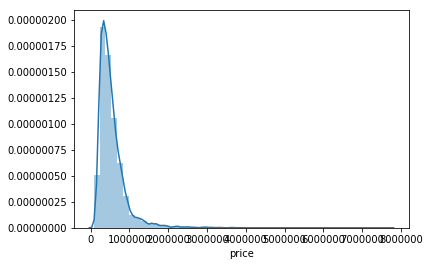

In [12]:
# 데이터의 밀도를 확인해 보도록 합시다.
sns.distplot(df_train['price'])

위에서 보시다시피 오른쪽으로 꼬리가 긴 분포를 가지는 것을 확인해 볼 수 있습니다.

((array([-3.91024552, -3.69050911, -3.57011438, ...,  3.57011438,
          3.69050911,  3.91024552]),
  array([11.26447693, 11.28979441, 11.30221678, ..., 15.74485584,
         15.7703098 , 15.85673102])),
 (0.5246386762816583, 13.04812230186611, 0.9944175231748045))

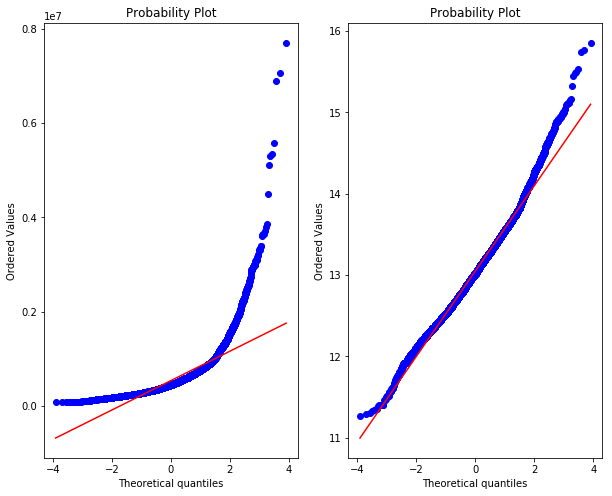

In [16]:
# 정규확률플롯을 그려봅시다
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(10,8)
stats.probplot(df_train['price'], plot=axes[0])
stats.probplot(np.log1p(df_train['price']), plot=axes[1])

위와 같이 price데이터에 상용로그를 취해주면 기존보다 더 정규성을 가지는 것을 확인할 수 있습니다.

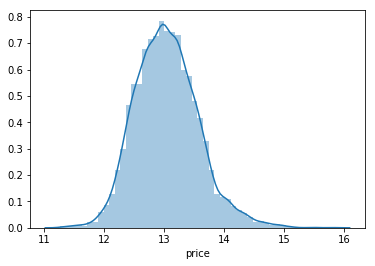

In [17]:
# 목적변수인 price 피처의 값을 상용로그로 scaling 해줍시다.
df_train['price'] = np.log1p(df_train['price'])

# 이제 다시 price 피처 데이터의 밀도를 확인해 보도록 합시다.
sns.distplot(df_train['price'])

In [18]:
# skewness and kurtosis
print('Skewness :', df_train['price'].skew())
print('Kurtosis :', df_train['price'].kurt())

Skewness : 0.4330991387067915
Kurtosis : 0.7316049825519855


#### 1.3.2 반응변수

이제 반응변수를 살펴보도록 합시다. 반응변수들 하나하나 시각화해가며 확인하기에는 시간이 많이 걸리기 때문에 목적변수인 price 피처(집값)과의 상관관계를 확인해 가장 상관관계가 높은 피처들을 시각화 해 보도록 하겠습니다.

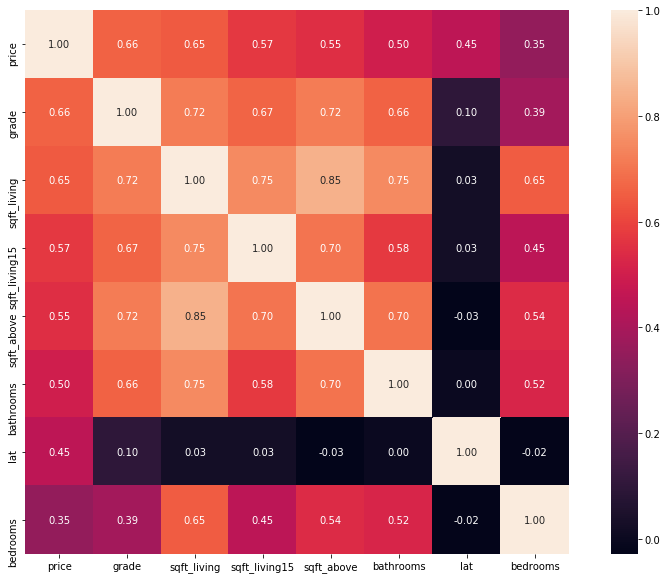

In [19]:
# 연속형 변수와 범주형 변수가 섞여있기때문에
# 피어슨 상관계수가 아닌 스피어만 상관계수를 사용
k = 8 # 가장 상관도가 높은 k개의 피처만 시각화 해 보겠습니다.
corrmat = np.abs(df_train.corr(method='spearman'))
cols = corrmat.nlargest(k, 'price').index

cor = np.array(stats.spearmanr(df_train[cols].values))[0]

plt.figure(figsize=(15,10))
sns.heatmap(data=cor, cbar=True, annot=True, annot_kws={'size':10}, xticklabels=cols.values, yticklabels=cols.values, fmt='.2f', square=True)

목적변수와 상관도가 높은 변수는 집의 등급 - 주거공간의 크기 - 전체 크기순이고, 위도를 뜻하는 lat라는 값도 들어있습니다. 양의 상관관계인것을 보니 위도가 증가할수록 가격의 값이 증가한다는 뜻인데, 왜 이렇것인지, 어떻게 활용할 수 있을지는 탐구가 필요할 듯 합니다.
* 집의 평수가 넓을수록 등급도 함께 높아지는 경향이 있다.
* 그리고 이 등급은 가격에 큰 영향을 미친다.<br><br>
그렇다면 이제 위에서 나온 상관관계를 바탕으로 반응변수들을 하나씩 시각화 해 볼 수 있도록 하겠습니다.

##### 1) Grade(등급)

In [20]:
print(df_train['grade'].unique())
print(len(df_train['grade'].unique()))

[ 7  6  8  9 10 11 12  5  4  3 13  1]
12


등급 데이터에는 총 12개의 등급이 있고, 그 범위가 명확히 정해져 있습니다. 따라서 grade 피처는 범주형 데이터(Categorical Data)입니다.'

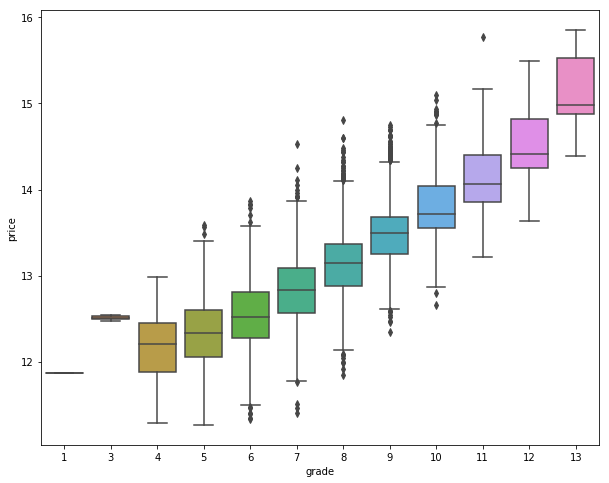

In [25]:
# 반응 변수 grade에 대한 목적 변수 price의 boxplot을 그려봅시다
data = pd.concat([df_train['grade'], df_train['price']], axis=1)
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(x='grade', y='price', data=data, ax=ax)

집의 등급이 높으면 가격이 높아지는 것은 위의 히트맵에서도 봤듯이 당연한 결과입니다. 그리고 전반적으로 상승곡선 형태도 보이고 있습니다. 하지만
* **등급 6,7,8,9 에서 이상치(outlier)가 많은 이유**
* **등급 8과 11에서 차이가 큰 이상치가 나타나는 이유**
<br>
위의 두가지는 좀 더 살펴볼 여지가 있어보입니다.

##### 2) sqft_living(주거 공간의 평방 피트)
주거공간의 평방 피트는 연속형 피처입니다. 따라서 regplot을 사용해보도록 하겠습니다.

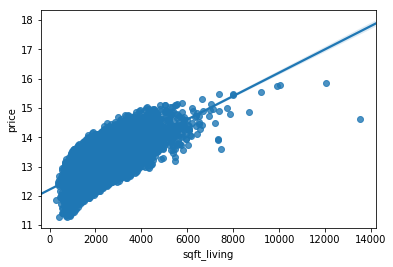

In [26]:
# sqft_living과 price사이의 regplot을 그려봅시다.
data = pd.concat([df_train['sqft_living'], df_train['price']], axis=1)
sns.regplot(x='sqft_living', y='price', data=data)

전반적으로 선형성을 보이지만 가격 14~15사이에 sqft_living이 14000이나 되는 값은 꽤나 이상한 값(이상치)으로 보입니다. 제거할 지 말 지는 저 값을 확인해보고 결정해 보도록 하겠습니다.<br><br>
또한 scatterplot을 확인해 보면 데이터들의 밀도가 낮은쪽으로 치우친 경향을 보이는 것을 확인할 수 있습니다. 이것 또한 재표현의 여지가 보입니다.

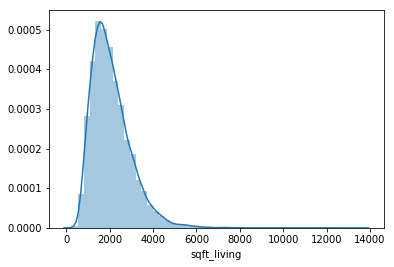

In [27]:
# 밀도를 확인해 보도록 하겠습니다.
sns.distplot(df_train['sqft_living'])

In [29]:
# skewness and kurtosis
print('Skewness :', df_train['sqft_living'].skew())
print('Kurtosis :', df_train['sqft_living'].kurt())

Skewness : 1.4924715984991939
Kurtosis : 5.73117790636769


##### 3) sqft_living15(2015년 기준 주거 공간의 평방 피트)

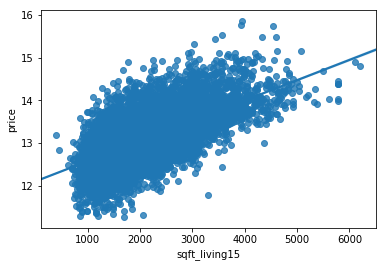

In [30]:
# sqft_living15와 price사이의 regplot을 그려봅시다.
data = pd.concat([df_train['sqft_living15'], df_train['price']], axis=1)
sns.regplot(x='sqft_living15', y='price', data=data)

sqft_living15의 경우 15년도 기준이다보니 가격의 분산이 비교적 큽니다. 아무래도 재건축으로 인한 영향일것으로 생각되어지고 sqft_living15 그 자체를 사용하기보다는 적절한 Feature Engineering이 필요해 보입니다.

##### 4) sqft_above(지하실을 제외한 평방 피트)
sqft_above 역시 연속형 수치데이터이기 때문에 regplot을 사용했습니다.

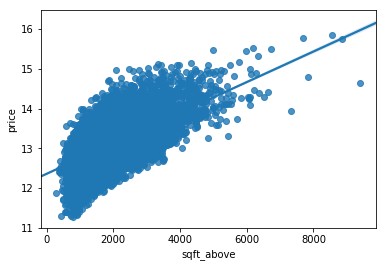

In [32]:
# sqft_above와 price의 regplot을 그려보겠습니다.
data = pd.concat([df_train['sqft_above'], df_train['price']], axis=1)
sns.regplot(x='sqft_above', y='price', data=data)

마찬가지로 전반적으로 선형성을 보이고 있지만 sqft_above데이터가 8000이 넘어가는 이상치가 관측됩니다. 이 역시 탐구의 여지가 있습니다. 또한 데이터가 낮은쪽에 몰려있는거 같습니다.<br>
마찬가지로 밀도를 확인해 보겠습니다.

In [0]:
# sqft_above피처의 밀도를 확인해 봅시다.


##### 5) bathrooms(욕실의 수)

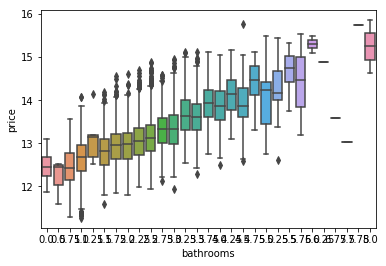

In [33]:
# bathrooms와 price 데이터 사이의 관계를 boxplot으로 시각화 해 보겠습니다
data = pd.concat([df_train['bathrooms'], df_train['price']], axis=1)
sns.boxplot(x='bathrooms', y='price', data=data)

bathrooms 같은 경우 소수점이 있어 헷갈릴 수도 있습니다. 각각의 값이 의미하는 것은 아래와 같고, 위의 값만을 가지고 각각의 값이 몇개 있는지는 구분하기 힘들어 보입니다.
* 0.5 : 세면대, 화장실
* 0.75 : 세면대, 화장실, 샤워실
* 1 : 세면대, 화장실, 샤워실, 욕조

##### 6) bedrooms(침실의 수)

In [0]:
# bedrooms와 price와의 관계를 boxplot으로 그려보도록 하겠습니다
data = pd.concat([df_train['bedrooms'], df_train['waterfront'],df_train['price']], axis=1)


### 1.4 결측치
결측치를 올바르게 처리하는 것 역시 모델의 성능을 상승시키는데 큰 역할을 합니다.<br>
결측치가 있는지 여부를 확인하고, 있다면 어떤 이유에서 결측치가 생겼는지 알아내는 것은 해당 결측치를 어떻게 처리할 지에 대한 인사이트를 줍니다.

In [0]:
# missingno 모듈을 사용해 결측치를 확인해 봅시다.
# !pip install missingno


다행히도 결측치는 없어 보입니다.

### 1.5 이상치(Outlier)
이상치란 데이터들의 일반적인 경향(평균, 중위수와 같은 대표값 주위)에서 크게 벗어난 데이터를 말합니다.<br> 이상치 역시 모델의 성능을 크게 좌우 합니다. 결측치와 마찬가지로 이러한 이상치가 나타난 이유를 파악하고 올바르게 처리하는 것이 중요합니다.

#### 1) Grade

In [0]:
df_train[df_train['price'] > 14.5].head(20)

In [0]:
# 8등급의 집들중에서 이상치들을 살펴봅시다


14.5 = e^14.5(1,202,604 $)<br>
이상한 데이터라기엔 고려해야 할 것이 많고 눈에띄게 이상한 점이 보이지가 않습니다. 다만 id 7173은 다른 조건들에 비해 가격이 좀 많이 높아보입니다. 삭제해주도록 하겠습니다.

In [0]:
# id 7173인 데이터는 삭제해주도록 하겠습니다


#### 2) sqft_living
위에서 살펴봤던 정보를 바탕으로 이상치를 확인해 보도록 합시다.

In [0]:
# 주거공간의 평방피트가 11000이 넘는 데이터를 살펴봅시다


두 거주공간 역시 거주공간 평방피트가 11000피트(약 300평)가 넘는데 5000(약 140평)피트 대와 집값이 비슷합니다.<br>
혹시나 다른 이유가 있을 수가 있지만, 아무래도 이상해 보이니 이 두 데이터는 삭제하도록 하겠습니다.

In [0]:
# 이상치 데이터를 지워주도록 합시다


In [0]:
df_train.shape

#### 3) sqft_living15
마찬가지로 해당 피처의 이상치 데이터를 확인해 보도록 합시다.

In [0]:
# sqft_living의 boxplot을 그려보도록 합시다


6000피트이상인 데이터만 보도록 하겠습니다.

In [0]:
# 6000피트 이상인 데이터 확인


다른 데이터들에 비해 비정상적으로 보일 정도록 벗어난 느낌은 없기 때문에 삭제는 하지 않겠습니다. 하지만, 많은 이상치로 인해 재표현의 여지는 있어 보입니다.

#### 4) sqft_above

In [0]:
# 이상치를 확인해 보도록 합시다


비교적 신축이고 등급도 높은 편, 방의 개수와 땅의 넓이도 높은편이라 가격도 높은편입니다. 이상한 데이터로는 보이지 않습니다.

#### 5) bathrooms

In [0]:
# bathrooms가 4.5, 5.25인 이상치만 확인해보도록 하겠습니다.


재건축을 비교적 최근에 한 편이고 주거공간도 넓은 편, 등급도 높습니다. 삭제하지 않겠습니다.

옛날에 지어진 건물이라 가격은 많이 떨어지는 편이지만, 같은 연도에 지어진 건물과 비교하면 방들의 수는 훨씬 많은 편인데 가격은 더 떨어집니다. 이상치로 판단하고 지우도록 하겠습니다.

In [0]:
# id 11701삭제


#### 6) bedrooms

In [0]:
# bedrooms가 5,6인 집중에 가격이 15.5을 넘는 데이터만 보겠습니다.


비슷한 가격대의 집들에 비해 넓은 땅의 면적이 가격을 더 올리는데 큰 역할을 한 듯 합니다. 그래도 두겠습니다.

### 1.6 유니크 갯수
범주형 데이터들 각각의 범주의 수를 나타내 보도록 하겠습니다.

In [0]:
# 각각의 범주의 수를 그래프로 그려봅시다
categorical_cols = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'zipcode']
num_unique = df_train[categorical_cols].nunique()
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x=num_unique.index, y=num_unique, order=num_unique.sort_values(ascending=False).index)

In [0]:
num_unique.sort_values(ascending=False)

## 2. 데이터 전처리(Data Preprocessing)
이제 앞서 본 정보들을 바탕으로 본격적으로 전처리를 해주도록 하겠습니다. 전처리는 모델의 성능에 크게 영향을 미치기 때문에 시간을 길게 잡고 여러가지 실험 해보는 것이 좋습니다.

### 2.1 이상치와 결측치 처리
이상치와 결측치는 앞선 탐색 과정에서 처리해버렸기 때문에 넘어가겠습니다.

### 2.2 정규화(Normalization)
살펴 본 데이터들 중에서 편향된 데이터들은 정규분포에 가깝게 정규화를 시켜주겠습니다.

In [0]:
# 처리하기 전 시각화

In [0]:
skew_columns = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']
skew_columns2 = ['sqft_living15', 'sqft_lot15'] # 1/3 제곱시켜 정규분포에 가깝게!

for c in skew_columns:
    df_train[c] = np.log1p(df_train[c].values)
    df_test[c] = np.log1p(df_test[c].values)
    
for c in skew_columns2:
    df_train[c] = np.power(df_train[c].values, 1/3)
    df_test[c] = np.power(df_test[c].values, 1/3)

In [0]:
# 처리 후 시각화

### 2.3 변수 생성
이미 존재하는 특징을 바탕으로 새로운 특징을 만들어 추가해서 Polynomial한 특성을 더욱 늘려주도록 하겠습니다.

In [0]:
df_train.shape, df_test.shape

In [0]:
for df in [df_train, df_test]:
    df['date'] = df['date'].apply(lambda x: x[0:8])
    df['year'] = df['date'].apply(lambda x: int(x[0:4]))
    df['month'] = df['date'].apply(lambda x: int(x[4:6]))
    df['day'] = df['date'].apply(lambda x: int(x[6:8]))
    
    del df['date']
    
    df['yr_renovated'] = df['yr_renovated'].apply(lambda x: np.nan if x == 0 else x)
    df['yr_renovated'] = df['yr_renovated'].fillna(df['yr_built'])

In [0]:
df_train.head()

In [0]:
for df in [df_train, df_test]:
    df['total_rooms'] = df['bedrooms'] + df['bathrooms']
    # 거실의 비율
    df['sqft_ratio'] = df['sqft_living'] / df['sqft_lot']
    # 총 면적
    df['sqft_total_size'] = df['sqft_living'] + df['sqft_lot'] + df['sqft_above'] + df['sqft_basement']
    # 면적 대비 거실 비율
    df['sqft_ratio_1'] = df['sqft_living'] / df['sqft_total_size']
    # 15년도 면적 대비 거실 비율
    df['sqft_total15'] = df['sqft_living15'] + df['sqft_lot15']
    df['sqft_ratio_2'] = df['sqft_living15'] / df['sqft_total15']

    df['is_renovated'] = df['yr_renovated'] - df['yr_built']
    df['is_renovated'] = df['is_renovated'].apply(lambda x: 0 if x==0 else 1)

In [0]:
df_train['per_price'] = df_train['price'] / df_train['sqft_total_size']
zipcode_price = df_train.groupby(['zipcode'])['per_price'].agg({'mean', 'var'}).reset_index()
df_train = pd.merge(df_train, zipcode_price, how='left', on='zipcode')
df_test = pd.merge(df_test, zipcode_price, how='left', on='zipcode')
del df_train['per_price']

In [0]:
df_train.head()

## 4. 모델링
저희가 얼마전에 배운 서포트 벡터 머신으로 모델링을 해보겠습니다.

In [0]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline

In [0]:
# 데이터를 준비해봅시다
X_reg = df_train.drop(['price', 'id'], axis=1)
y_reg = df_train['price']
X_test = df_test.drop(['id'], axis=1)
train_id = df_train['id']
test_id = df_test['id']

In [0]:
# 교차 검증 함수를 준비해 봅시다.
kfolds = KFold(n_splits=5, shuffle=True, random_state=2019)

def cv_rmse(model):
  rmse = np.sqrt(-cross_val_score(estimator=model, X=X_reg, y=y_reg, scoring='neg_mean_squared_error', cv=kfolds))
  return rmse

In [0]:
# 예측을 해보도록 합시다
SVR_model = make_pipeline(StandardScaler(), SVR(C=1.0, verbose=1)).fit(X_reg, y_reg)

In [0]:
print('Support Vector Regressor rmse :', cv_rmse(SVR_model).mean())

In [0]:
Y_predict = SVR_model.predict(X_test)
submission = pd.read_csv('sample_submission.csv')
submission['price'] = np.expm1(Y_predict)

In [0]:
# 제출파일 만들기
submission.to_csv('SVR_submission.csv', index=False)